# Quantization of Signals

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Characteristic of a Linear Uniform Quantizer

The characteristics of a quantizer depend on the mapping functions $f(\cdot)$, $g(\cdot)$ and the rounding operation $\lfloor \cdot \rfloor$ introduced in the [previous section](introduction.ipynb). A linear quantizer bases on linear mapping functions $f(\cdot)$ and $g(\cdot)$. A uniform quantizer splits the mapped input signal into quantization steps of equal size. Quantizers can be described by their nonlinear in-/output characteristic $x_Q[k] = \mathcal{Q} \{ x[k] \}$, where $\mathcal{Q} \{ \cdot \}$ denotes the quantization process. For linear uniform quantization it is common to differentiate between two characteristic curves, the so called mid-tread and mid-rise. Both are introduced in the following.

### Mid-Tread Characteristic Curve

The in-/output relation of the mid-tread quantizer is given as

\begin{equation}
x_Q[k] = Q \cdot \underbrace{\left\lfloor \frac{x[k]}{Q} + \frac{1}{2} \right\rfloor}_{index}
\end{equation}

where $Q$ denotes the constant quantization step size and $\lfloor \cdot \rfloor$ the [floor function](https://en.wikipedia.org/wiki/Floor_and_ceiling_functions) which maps a real number to the largest integer not greater than its argument. Without restricting $x[k]$ in amplitude, the resulting quantization indexes are [countable infinite](https://en.wikipedia.org/wiki/Countable_set). For a finite number of quantization indexes, the input signal has to be restricted to a minimal/maximal amplitude $x_\text{min} < x[k] < x_\text{max}$ before quantization. The resulting quantization characteristic of a linear uniform mid-tread quantizer is shown below

![Characteristic of a linear uniform mid-tread quantizer](mid_tread_characteristic.png)

The term mid-tread is due to the fact that small values $|x[k]| < \frac{Q}{2}$ are mapped to zero.

#### Example - Mid-tread quantization of a sine signal

The quantization of one period of a sine signal $x[k] = A \cdot \sin[\Omega_0\,k]$ by a mid-tread quantizer is simulated. $A$ denotes the amplitude of the signal, $x_\text{min} = -1$ and $x_\text{max} = 1$ are the smallest and largest output values of the quantizer, respectively.

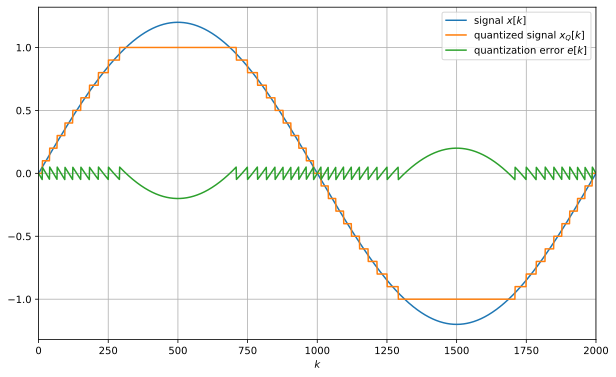

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = 1.2  # amplitude of signal
Q = 1/10  # quantization stepsize
N = 2000  # number of samples


def uniform_midtread_quantizer(x, Q):
    '''Uniform mid-tread quantizer with limiter.'''
    # limiter
    x = np.copy(x)
    idx = np.where(np.abs(x) >= 1)
    x[idx] = np.sign(x[idx])
    # linear uniform quantization
    xQ = Q * np.floor(x/Q + 1/2)

    return xQ


def plot_signals(x, xQ):
    '''Plot continuous, quantized and error signal.'''
    e = xQ - x
    plt.figure(figsize=(10, 6))
    plt.plot(x, label=r'signal $x[k]$')
    plt.plot(xQ, label=r'quantized signal $x_Q[k]$')
    plt.plot(e, label=r'quantization error $e[k]$')
    plt.xlabel(r'$k$')
    plt.axis([0, N, -1.1*A, 1.1*A])
    plt.legend()
    plt.grid()


# generate signal
x = A * np.sin(2*np.pi/N * np.arange(N))
# quantize signal
xQ = uniform_midtread_quantizer(x, Q)
# plot signals
plot_signals(x, xQ)

**Exercise**

* Change the quantization stepsize `Q` and the amplitude `A` of the signal. Which effect does this have on the quantization error?

Solution: The smaller the quantization step size, the smaller the quantization error is for $|x[k]| < 1$. Note, the quantization error is not bounded for $|x[k]| > 1$ due to the clipping of the signal $x[k]$.

### Mid-Rise Characteristic Curve

The in-/output relation of the mid-rise quantizer is given as

\begin{equation}
x_Q[k] = Q \cdot \Big( \underbrace{\left\lfloor\frac{ x[k] }{Q}\right\rfloor}_{index}  + \frac{1}{2} \Big)
\end{equation}

where $\lfloor \cdot \rfloor$ denotes the floor function. The quantization characteristic of a linear uniform mid-rise quantizer is illustrated below

![Characteristic of a linear uniform mid-rise quantizer](mid_rise_characteristic.png)

The term mid-rise copes for the fact that $x[k] = 0$ is not mapped to zero. Small positive/negative values around zero are mapped to $\pm \frac{Q}{2}$.

#### Example - Mid-rise quantization of a sine signal

The previous example is now reevaluated using the mid-rise characteristic

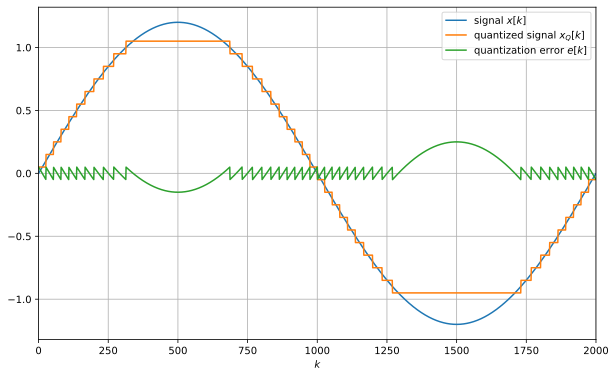

In [2]:
A = 1.2  # amplitude of signal
Q = 1/10  # quantization stepsize
N = 2000  # number of samples


def uniform_midrise_quantizer(x, Q):
    '''Uniform mid-rise quantizer with limiter.'''
    # limiter
    x = np.copy(x)
    idx = np.where(np.abs(x) >= 1)
    x[idx] = np.sign(x[idx])
    # linear uniform quantization
    xQ = Q * (np.floor(x/Q) + .5)

    return xQ


# generate signal
x = A * np.sin(2*np.pi/N * np.arange(N))
# quantize signal
xQ = uniform_midrise_quantizer(x, Q)
# plot signals
plot_signals(x, xQ)

**Exercise**

* What are the differences between the mid-tread and the mid-rise characteristic curves for the given example?

Solution: The mid-tread and the mid-rise quantization of the sine signal differ for signal values smaller than half of the quantization interval. Mid-tread has a representation of $x[k] = 0$ while this is not the case for the mid-rise quantization.

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples*.